# 1. Generating five images passing five noise vectors/matrices drawn from a normal distribution with mean 5 and variance 1 through the Decoder of your normal Autoencoder.

## Import Necessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

## Load and Preprocess the MNIST Dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('Shape of flattened training data:', x_train_flat.shape)
print('Shape of flattened test data:', x_test_flat.shape)

Shape of flattened training data: (60000, 784)
Shape of flattened test data: (10000, 784)


## Build the Autoencoder Model

In [3]:
LATENT_DIM = 32 
INPUT_DIM = 784

encoder_input = Input(shape=(INPUT_DIM,))
x = Dense(128, activation='relu')(encoder_input)
encoder_output = Dense(LATENT_DIM, activation='relu')(x)
encoder = Model(encoder_input, encoder_output, name='encoder')
print("--- Encoder Summary ---")
encoder.summary()

decoder_input = Input(shape=(LATENT_DIM,))
x = Dense(128, activation='relu')(decoder_input)
decoder_output = Dense(INPUT_DIM, activation='sigmoid')(x)
decoder = Model(decoder_input, decoder_output, name='decoder')
print("\n--- Decoder Summary ---")
decoder.summary()

autoencoder_input = Input(shape=(INPUT_DIM,))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name='autoencoder')
print("\n--- Full Autoencoder Summary ---")
autoencoder.summary()

I0000 00:00:1752738054.555278 3640140 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


--- Encoder Summary ---


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,608 (408.62 KB)

 Trainable params: 104,608 (408.62 KB)

 Non-trainable params: 0 (0.00 B)


--- Decoder Summary ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)


--- Full Autoencoder Summary ---


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       104,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       105,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the Autoencoder

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

print("\n--- Training the Autoencoder ---")
history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat)
)


--- Training the Autoencoder ---
Epoch 1/20


I0000 00:00:1752647642.354981 1989108 service.cc:152] XLA service 0x7b2ecc002690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752647642.355023 1989108 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-07-16 12:34:02.370945: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752647642.453909 1989108 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-16 12:34:03.023713: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_170', 8 bytes spill stores, 8 bytes spill loads

2025-07-16 12:34:03.033547: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_163', 12

159/235 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.1042

I0000 00:00:1752647645.573378 1989108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


212/235 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0942

2025-07-16 12:34:06.424002: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_156', 156 bytes spill stores, 156 bytes spill loads

2025-07-16 12:34:06.481604: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_163', 8 bytes spill stores, 8 bytes spill loads

2025-07-16 12:34:06.588205: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_170', 56 bytes spill stores, 64 bytes spill loads

2025-07-16 12:34:06.968196: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_170', 8 bytes spill stores, 8 bytes spill loads

2025-07-16 12:34:07.059756: I external/local_x

235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0906 - val_loss: 0.0320
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - val_loss: 0.0209
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0204 - val_loss: 0.0174
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 - val_loss: 0.0154
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0155 - val_loss: 0.0140
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 - val_loss: 0.0131
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0123 - val_loss: 0.0117
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119 - val_loss: 0.0114
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0

## Generate and Display Images from Noise

Shape of generated noise vectors: (5, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


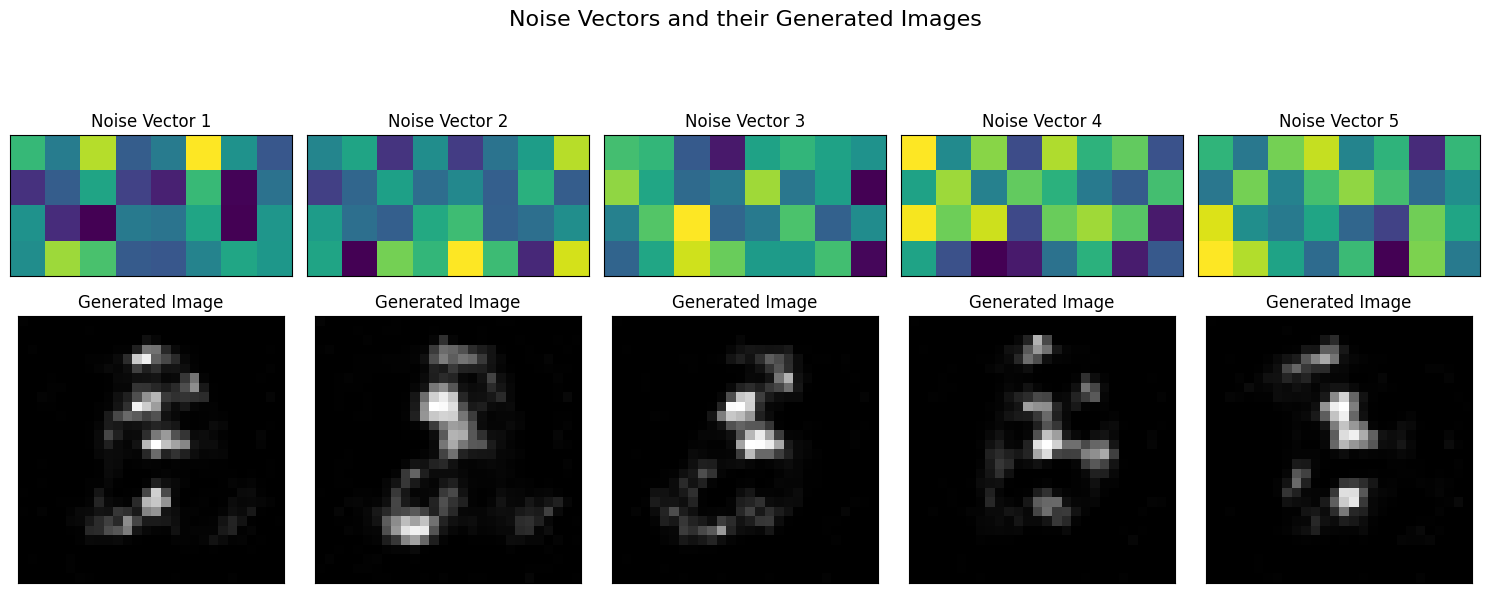

In [ ]:
n = 5

noise_mean = 5.0
noise_variance = 1.0
noise_stddev = np.sqrt(noise_variance)

noise_vectors = np.random.normal(loc=noise_mean, scale=noise_stddev, size=(n, LATENT_DIM))

print(f"Shape of generated noise vectors: {noise_vectors.shape}")

generated_images_flat = decoder.predict(noise_vectors)

generated_images = generated_images_flat.reshape(n, 28, 28)

plt.figure(figsize=(15, 6))
plt.suptitle("Noise Vectors and their Generated Images", fontsize=16)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_vectors[i].reshape(4, 8), cmap='viridis')
    plt.title(f"Noise Vector {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i], cmap='gray')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Generating five images passing five noise vectors/matrices drawn from a normal distribution with mean 5 and variance through the Decoder of your Denoising Autoencoder.

## Load and Preprocess the MNIST Dataset

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples


## Add Noise to the Dataset

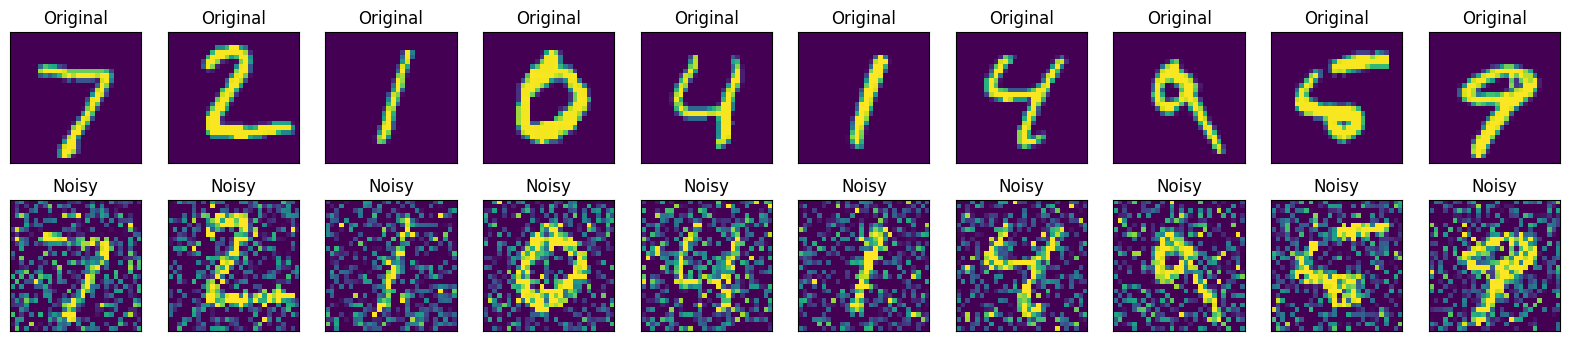

In [14]:
noise_factor = 0.4

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Build the Denoising Autoencoder Model

In [ ]:
LATENT_DIM = 32

encoder_input = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(encoder_input) # 14x14
x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x) # 7x7
shape_before_flattening = x.shape[1:]
x = Flatten()(x)
encoder_output = Dense(LATENT_DIM, activation='relu')(x)
encoder = Model(encoder_input, encoder_output, name='encoder')
print("--- Encoder Summary ---")
encoder.summary()

decoder_input = Input(shape=(LATENT_DIM,))
x = Dense(np.prod(shape_before_flattening), activation='relu')(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2)(x) # 14x14
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(x) # 28x28
decoder_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decoder = Model(decoder_input, decoder_output, name='decoder')
print("\n--- Decoder Summary ---")
decoder.summary()

autoencoder_input = Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
denoising_autoencoder = Model(autoencoder_input, decoded_img, name='denoising_autoencoder')
print("\n--- Full Denoising Autoencoder Summary ---")
denoising_autoencoder.summary()

--- Encoder Summary ---


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        50,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,008 (214.88 KB)

 Trainable params: 55,008 (214.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Decoder Summary ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1568)           │        51,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,761 (256.88 KB)

 Trainable params: 65,761 (256.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Full Denoising Autoencoder Summary ---


Model: "denoising_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │        55,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        65,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,769 (471.75 KB)

 Trainable params: 120,769 (471.75 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the Denoising Autoencoder

In [ ]:
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print("\n--- Training the Denoising Autoencoder ---")
denoising_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=25,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


--- Training the Denoising Autoencoder ---
Epoch 1/25
427/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3434

2025-07-16 13:08:10.953355: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_334', 4 bytes spill stores, 4 bytes spill loads

2025-07-16 13:08:10.990444: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_334', 40 bytes spill stores, 40 bytes spill loads

2025-07-16 13:08:11.019937: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_334', 36 bytes spill stores, 36 bytes spill loads

2025-07-16 13:08:11.257863: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_681', 212 bytes spill stores, 212 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3339 - val_loss: 0.1385
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1324 - val_loss: 0.1182
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1183 - val_loss: 0.1123
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1123 - val_loss: 0.1083
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1083 - val_loss: 0.1054
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1058 - val_loss: 0.1036
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1037 - val_loss: 0.1025
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1024 - val_loss: 0.1006
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1010 - val_loss: 0.0996
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1002 - val_loss: 0.0988
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0995 - val_loss: 0.0987
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

## Generate and Display Images from Noise

Shape of generated noise vectors: (5, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


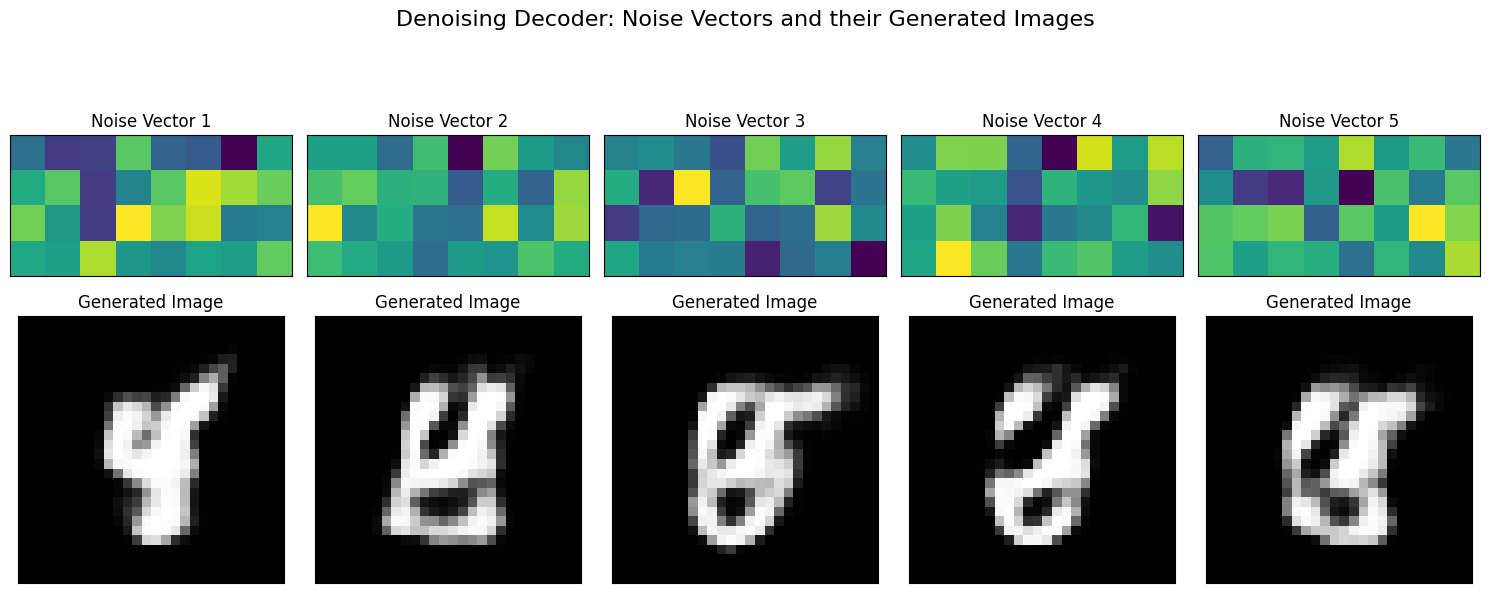

In [ ]:
n = 5

noise_mean = 5.0
noise_variance = 1.0
noise_stddev = np.sqrt(noise_variance)

noise_vectors = np.random.normal(loc=noise_mean, scale=noise_stddev, size=(n, LATENT_DIM))

print(f"Shape of generated noise vectors: {noise_vectors.shape}")

generated_images = decoder.predict(noise_vectors)

plt.figure(figsize=(15, 6))
plt.suptitle("Denoising Decoder: Noise Vectors and their Generated Images", fontsize=16)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_vectors[i].reshape(4, 8), cmap='viridis')
    plt.title(f"Noise Vector {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3. Training and evaluating a Variational Autoencoder

## Load and Preprocess the MNIST Dataset

In [20]:
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train.astype('float32') / 255., -1)
x_test = np.expand_dims(x_test.astype('float32') / 255., -1)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


## Building the VAE Model Components

In [21]:
LATENT_DIM = 2
IMAGE_SHAPE = (28, 28, 1)

encoder_inputs = Input(shape=IMAGE_SHAPE)
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)

z_mean = Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = Dense(LATENT_DIM, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(LATENT_DIM,), name='z')([z_mean, z_log_var])

encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
print("--- Encoder Summary ---")
encoder.summary()

decoder_inputs = Input(shape=(LATENT_DIM,))
x = Dense(7 * 7 * 64, activation='relu')(decoder_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
decoder = Model(decoder_inputs, decoder_outputs, name='decoder')
print("\n--- Decoder Summary ---")
decoder.summary()

--- Encoder Summary ---


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 14, 14,    │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3136)      │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │     50,192 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)


--- Decoder Summary ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

## Defining the Full VAE Model with Custom Loss

In [22]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
        
    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def _calculate_loss(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            )
        )
        
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        
        total_loss = reconstruction_loss + kl_loss
        return total_loss, reconstruction_loss, kl_loss

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
            
        with tf.GradientTape() as tape:
            total_loss, reconstruction_loss, kl_loss = self._calculate_loss(data)
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        total_loss, reconstruction_loss, kl_loss = self._calculate_loss(data)

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}

print("VAE model class defined with call() and test_step().")

VAE model class defined with call() and test_step().


## Instantiate, Compile, and Train the VAE

In [23]:
vae = VAE(encoder, decoder)

vae.compile(optimizer=keras.optimizers.Adam())

print("\n--- Training the VAE ---")
history = vae.fit(x_train, epochs=20, batch_size=128, validation_data=(x_test, None))


--- Training the VAE ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 2.7636 - reconstruction_loss: 261.8919 - total_loss: 264.6554 - val_kl_loss: 3.8203 - val_reconstruction_loss: 189.3372 - val_total_loss: 193.1575
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - kl_loss: 4.0795 - reconstruction_loss: 184.5887 - total_loss: 188.6681 - val_kl_loss: 5.8103 - val_reconstruction_loss: 164.7532 - val_total_loss: 170.5634
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - kl_loss: 5.9749 - reconstruction_loss: 162.7975 - total_loss: 168.7724 - val_kl_loss: 6.2211 - val_reconstruction_loss: 157.0380 - val_total_loss: 163.2590
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - kl_loss: 6.1998 - reconstruction_loss: 155.7167 - total_loss: 161.9165 - val_kl_loss: 6.0498 - val_reconstruction_loss: 155.1814 - val_total_loss: 161.2313
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - kl_loss: 6.3075 - reconstruction_loss: 153.1517 - total_loss: 159.4593 - val_kl_

## Evaluate the Trained VAE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


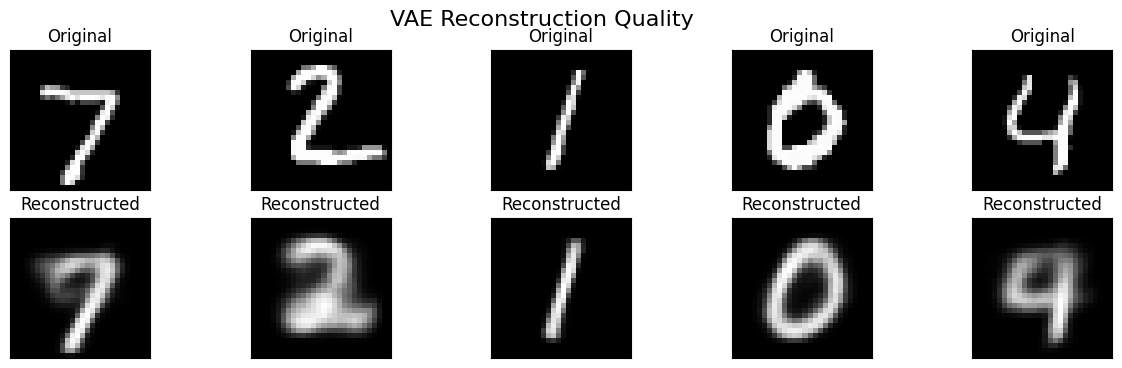

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


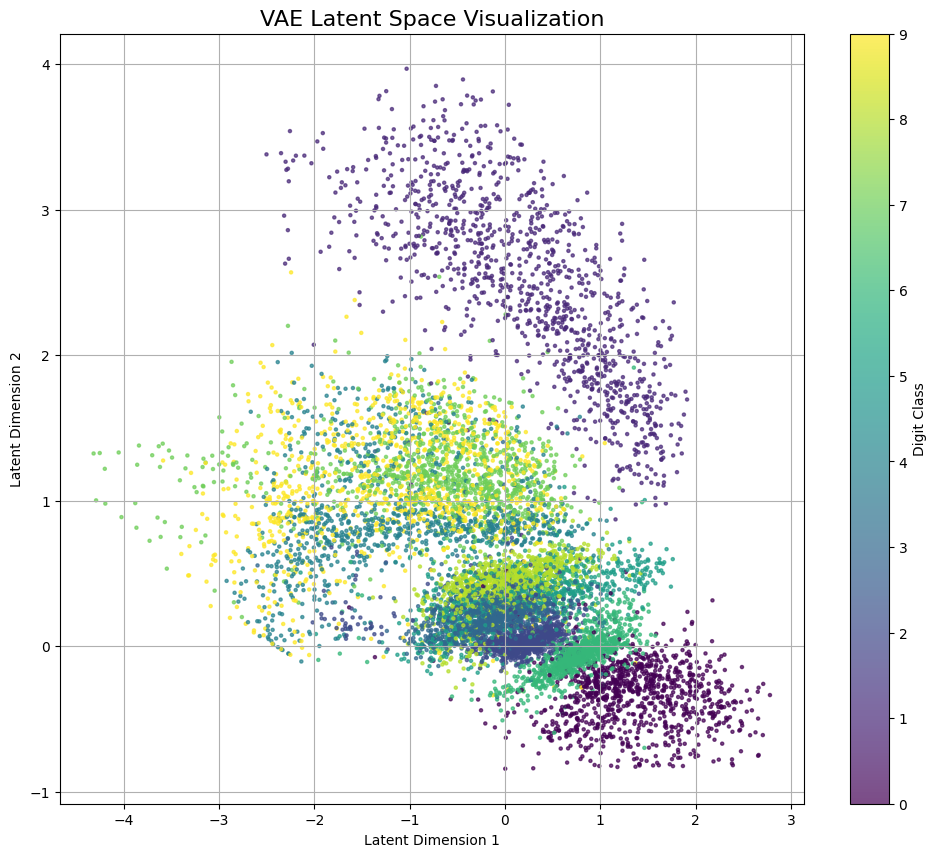

In [24]:
n = 5
sample_images = x_test[:n]

_, _, z_samples = vae.encoder.predict(sample_images)
reconstructed_images = vae.decoder.predict(z_samples)

plt.figure(figsize=(15, 4))
plt.suptitle("VAE Reconstruction Quality", fontsize=16)
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.set_title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

z_mean, _, _ = vae.encoder.predict(x_test, batch_size=128)

plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test, cmap='viridis', s=5, alpha=0.7)
plt.colorbar(label='Digit Class')
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("VAE Latent Space Visualization", fontsize=16)
plt.grid(True)
plt.show()

## Generated Image from Random Noise with Mean 5 and Variance 1

Shape of generated noise vectors: (5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


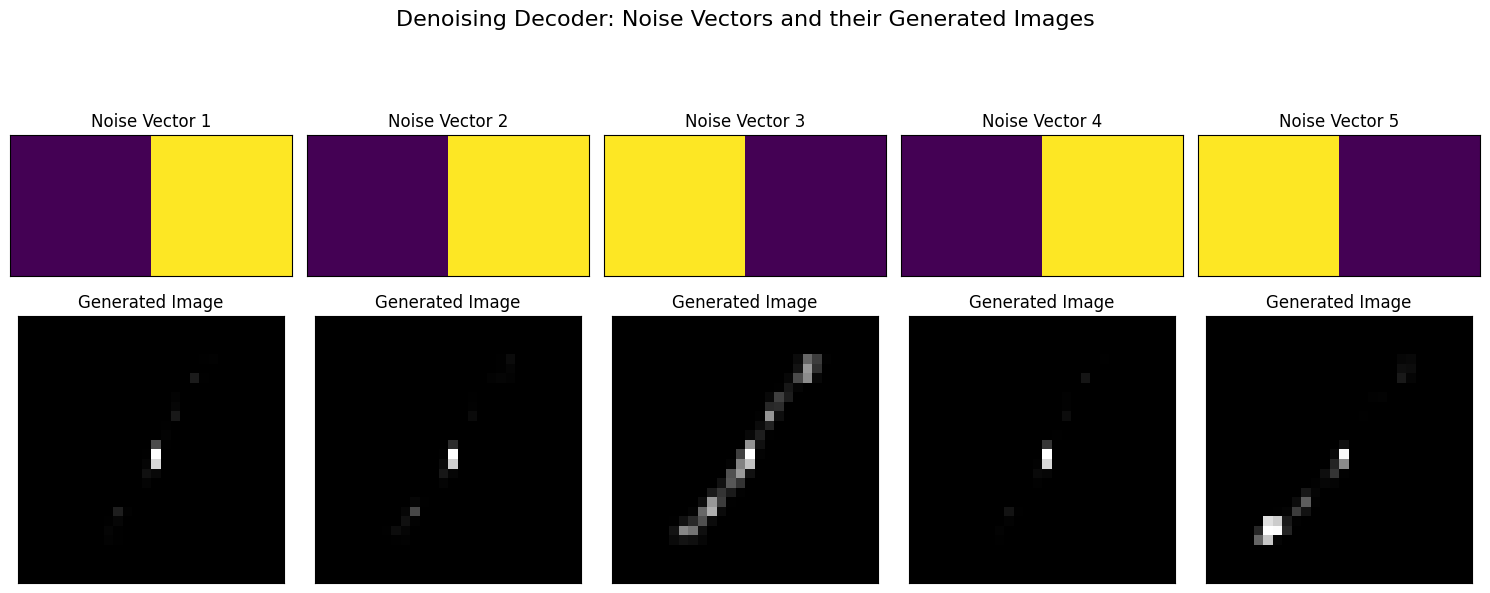

In [28]:
n = 5

noise_mean = 5.0
noise_variance = 1.0
noise_stddev = np.sqrt(noise_variance)

noise_vectors = np.random.normal(loc=noise_mean, scale=noise_stddev, size=(n, LATENT_DIM))

print(f"Shape of generated noise vectors: {noise_vectors.shape}")

generated_images = decoder.predict(noise_vectors)

plt.figure(figsize=(15, 6))
plt.suptitle("Denoising Decoder: Noise Vectors and their Generated Images", fontsize=16)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_vectors[i].reshape(1, 2), cmap='viridis')
    plt.title(f"Noise Vector {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

70/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Calculated Cluster Centers in Latent Space:
  Digit 0: [-0.53, -0.27]
  Digit 1: [-0.69, 2.03]
  Digit 2: [-0.03, 0.12]
  Digit 3: [0.09, 0.40]
  Digit 4: [1.03, 0.65]
  Digit 5: [-0.19, 0.57]
  Digit 6: [-0.42, 0.02]
  Digit 7: [1.57, 1.24]
  Digit 8: [-0.04, 0.72]
  Digit 9: [1.20, 0.75]

Shape of generated targeted vectors: (5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


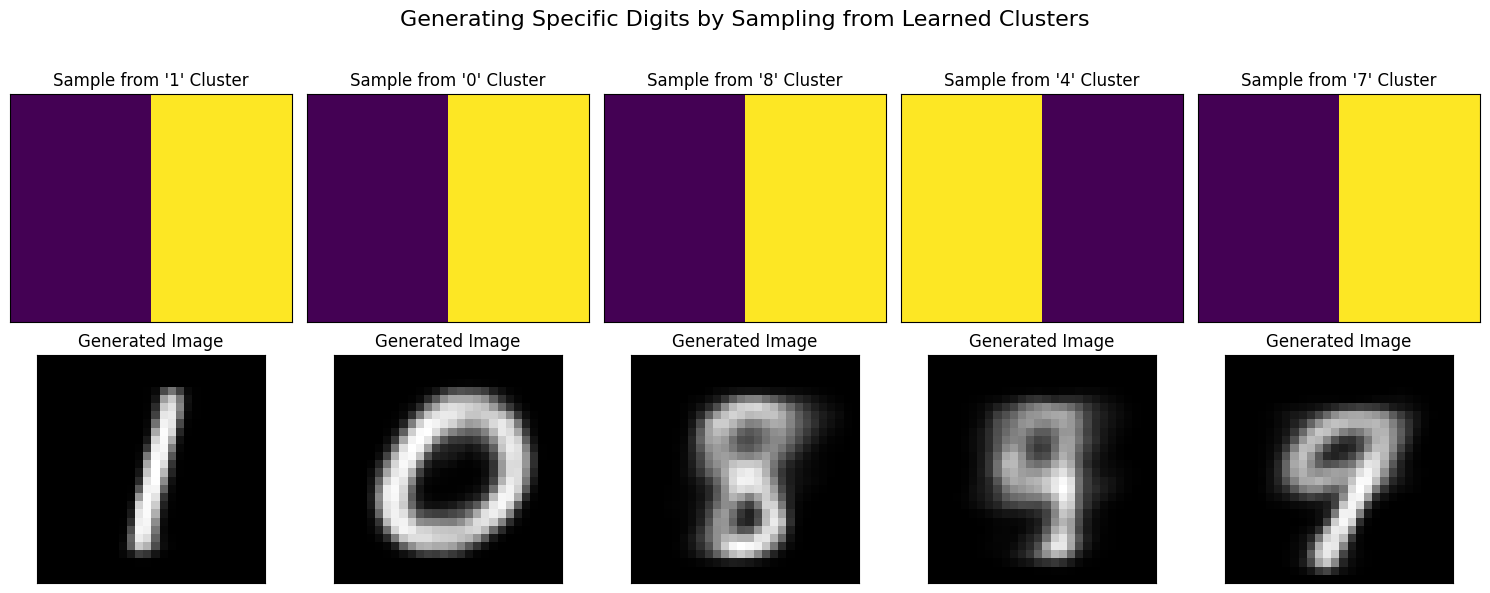

In [ ]:
z_mean, _, _ = vae.encoder.predict(x_test, batch_size=128)

cluster_centers = {}
for digit in range(10):
    z_mean_digit = z_mean[y_test == digit]
    center = np.mean(z_mean_digit, axis=0)
    cluster_centers[digit] = center

print("Calculated Cluster Centers in Latent Space:")
for digit, center in cluster_centers.items():
    print(f"  Digit {digit}: [{center[0]:.2f}, {center[1]:.2f}]")

digits_to_generate = [1, 0, 8, 4, 7] 
n = len(digits_to_generate)
noise_vectors = []

for digit in digits_to_generate:
    center = cluster_centers[digit]
    noise = np.random.normal(loc=0.0, scale=0.3, size=center.shape) 
    sample_vector = center + noise
    noise_vectors.append(sample_vector)

noise_vectors = np.array(noise_vectors)
print(f"\nShape of generated targeted vectors: {noise_vectors.shape}")

generated_images = decoder.predict(noise_vectors)

plt.figure(figsize=(15, 6))
plt.suptitle("Generating Specific Digits by Sampling from Learned Clusters", fontsize=16)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_vectors[i].reshape(1, 2), cmap='viridis', aspect='auto')
    plt.title(f"Sample from '{digits_to_generate[i]}' Cluster")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()